## 2주차 미션 소개 - EDA를 통한 머신러닝에 영향을 미치는 주요 변수 확인하기

* EDA 를 통해 어떤 피처가 이탈에 영향을 미치는지 확인하고 피처를 변경해서 모델의 성능 개선해 보기
* EDA는 데이터의 구조, 패턴, 이상치, 변수 간 관계 등을 파악하는 데 도움을 줍니다. 모델링 전 데이터에 대한 이해를 가능하게 합니다. 고객 이탈에 영향을 미치는 중요 변수를 식별함으로써, 더 효과적인 피처 선택을 할 수 있습니다. 불필요하거나 적절하지 않은 피처를 제거함으로써, 모델이 특정 데이터에 과적합되는 것을 방지할 수 있습니다. EDA과정은 모델의 복잡성을 줄이고, 성능을 개선하기 위한 피처엔지니어링 전략을 세우는데 중요합니다.

* 미션 데이터셋 소개
    * 해당 Kaggle 데이터셋( https://www.kaggle.com/blastchar/telco-customer-churn )은 통신사 고객 이탈(Churn)에 대한 정보를 담고 있습니다. IBM에서 제공한 이 데이터셋은 고객 유지에 필요한 행동을 예측하는 데 사용될 수 있으며, 고객 데이터를 분석하여 고객 유지 프로그램을 개발하는 데 도움이 됩니다.
    * 해당 데이터셋은 다음의 정보로 구성되어 있습니다.
        * 고객 인구 통계 정보(Demographic info): 고객의 성별, 연령대, 배우자 및 부양 가족의 유무(Gender, SeniorCitizen, Partner, Dependents) 등에 관한 정보가 포함되어 있습니다.
        * 고객 이탈(Churn) 정보: 서비스를 중단 여부에 대한 정보가 포함되어 있습니다.
        * 서비스 가입 정보(Services subscribed): 고객들이 가입한 서비스들, 예를 들어 전화, 다중 라인, 인터넷, 온라인 보안, 온라인 백업, 장치 보호, 기술 지원, 스트리밍 TV 및 영화( honeService, MultipleLine, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies) 등에 대한 정보가 있습니다.
        * 고객 계정 정보(Customer account info): 고객이 얼마나 오래 서비스를 이용했는지, 계약 유형, 결제 방법, 무페이퍼 청구 여부, 월별 요금, 총 요금 (CustomerID, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Tenure)등의 정보가 담겨 있습니다.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# 미션 수행을 위해 데이터셋을 로드합니다.
df = pd.read_csv("https://bit.ly/telco-csv", index_col="customerID")
df.shape

(7043, 20)

In [3]:
df.info() #데이터 타입 및 결측치 확인

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null 

In [4]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
# TotalCharges 가 수치 타입이 아니기 때문에 수치 연산을 위해 숫자 형태로 변경합니다.
#  errors="coerce" : 숫자로 변경 불가능한 데이터는 NaN 값으로 대체
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

In [6]:
# 요약 통계
# 수치형 변수만 자동 선택
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [7]:
# 요약 통계
# 모든 변수에 대해서 요약
df.describe(include='all')

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043.000000,7032.000000,7043
unique,2,NaN,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,NaN,2
top,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,NaN,No
freq,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,NaN,NaN,5174
mean,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,2283.300441,NaN
std,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,2266.771362,NaN
min,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,18.800000,NaN
25%,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,401.450000,NaN
50%,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,1397.475000,NaN
75%,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,3794.737500,NaN


In [8]:
# 요약 통계
# 범주형 변수에 대해서 요약
df.describe(include='object')

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


<Axes: xlabel='Churn', ylabel='count'>

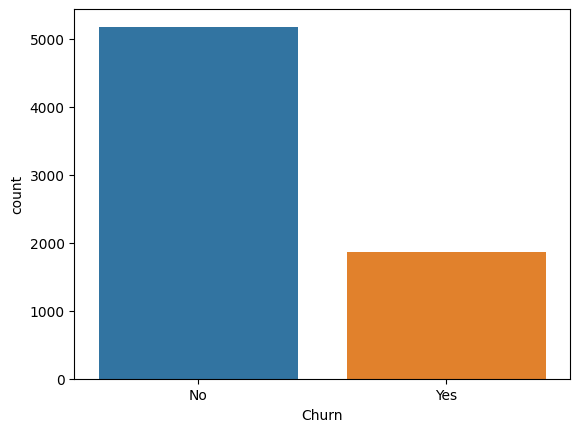

In [9]:
sns.countplot(data=df, x="Churn", hue='Churn') # 정답 클래스 countplot

## 미션 1 -  전체 수치 변수를 정답인 이탈 여부로 시각화하고 분석하기
데이터셋의 모든 수치형 변수를 이탈 여부에 따라 시각화하고 수치 구간에 따라 이탈률의 차이에 대해 분석해 주세요.
아래 이미지는 참고용으로 아래 이미지와 똑같이 시각화하지 않아도 됩니다. 이탈 여부를 잘 분석할 수 있는 시각화라면 어떤 시각화든 좋습니다.

<img src="https://i.imgur.com/oCQ9D0l.png">

In [10]:
# 위 예시처럼 수치 변수에 대한 히스토그램을 정답값으로 색상을 다르게 하여 히스토그램으로 시각화 해주세요.
# 수치형 데이터 컬럼을 가져오기
num_col = df._get_numeric_data().columns.tolist()
num_col

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

In [11]:
df_no = df[df['Churn'] == 'No'].copy() # Churn 이 No 인 경우의 데이터셋만 가져옴
df_yes = df[df['Churn'] == 'Yes'].copy() # Churn 이 Yes 인 경우의 데이터셋만 가져옴

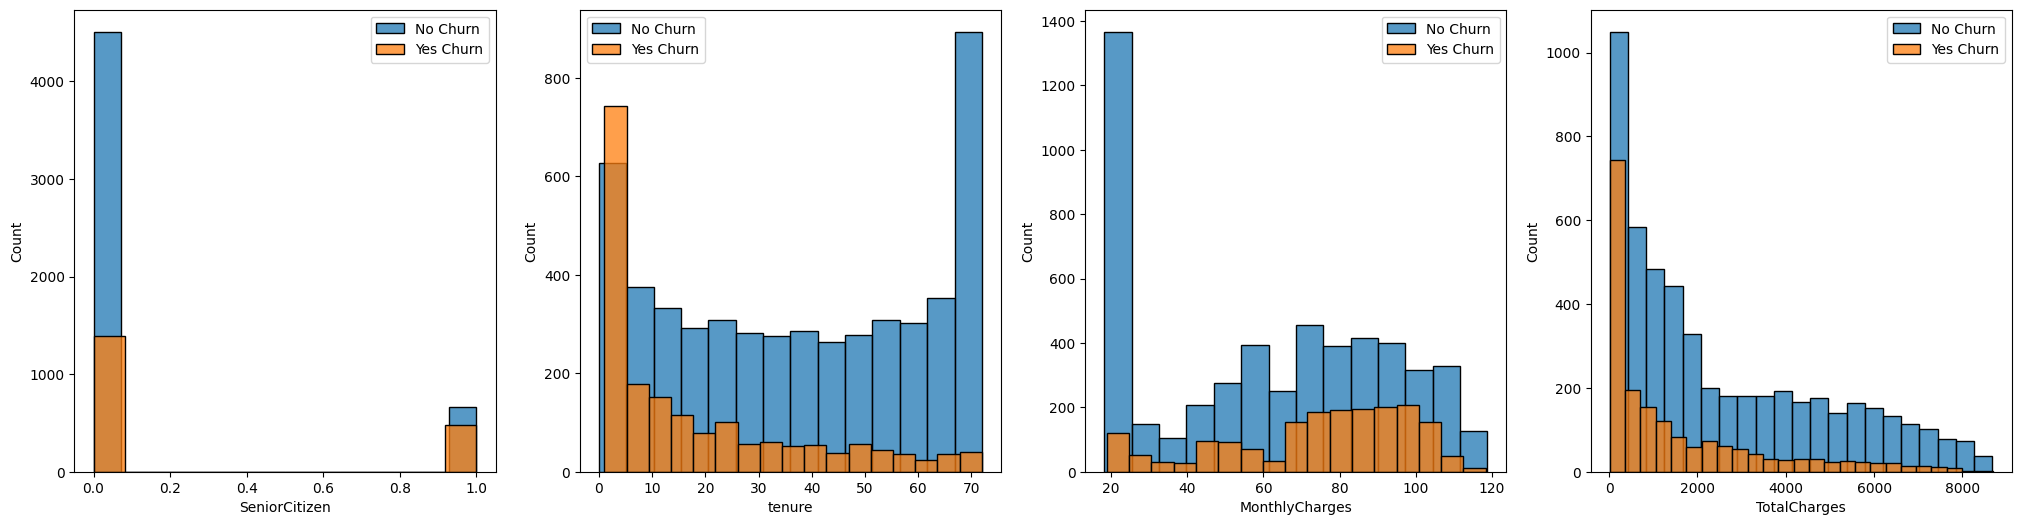

In [12]:
plt.figure(figsize =(25,6))

#히스토그램으로 표현

for i in range(len(num_col)):
  plt.subplot(1,4,i+1)
  sns.histplot(df_no[num_col[i]], label='No Churn')
  sns.histplot(df_yes[num_col[i]], label='Yes Churn')
  plt.legend()


# 분포를 보면 SeniorCitizen 은 수치형 데이터지만 category
# 사용 기간 > 이탈한 고객은 이용 기간이 짧음 / 비이탈 고객과 반대되는 성향
# 월 요금의 경우, 이탈 고객은 월 요금 분포가 상대적으로 고르게 형성 > 이탈 고객의 월 요금이 높을 것 같다.
# 비이탈 고객의 월 요금은 20-30 구간에 집중

In [13]:
#groupby

df.groupby('Churn').agg(mean_month=('MonthlyCharges', 'mean'))
# 이탈자의 평균 월 요금이 높은 것을 확인

,mean_month
Churn,
No,61.265124
Yes,74.441332


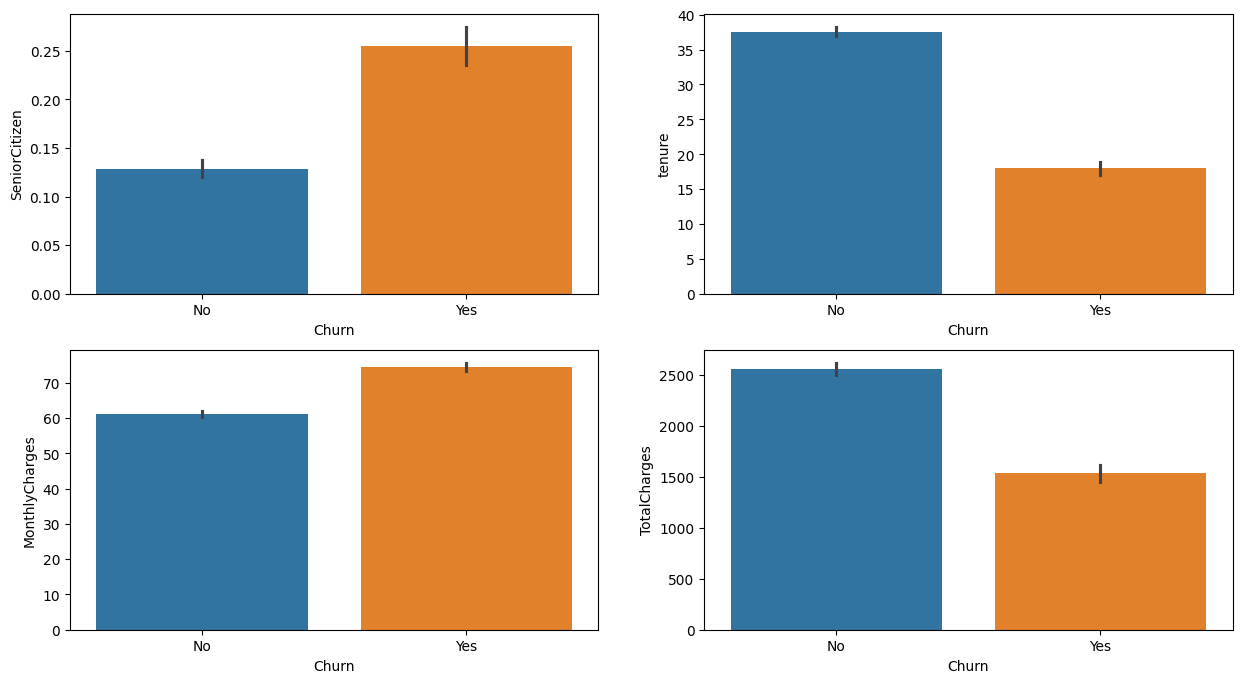

In [14]:
#barplot을 통해 정답값과 관련한 수치형 변수 보기
plt.figure(figsize=(15,8))
for i in range(len(num_col)):
  plt.subplot(2, 2, i+1)
  sns.barplot(data=df, x="Churn", y=num_col[i], hue="Churn")

<ipython-input-15-f3d7b2670eac>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_no[num_col[i]], label='No Churn')
<ipython-input-15-f3d7b2670eac>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_yes[num_col[i]], label='Yes Churn')
<ipython-input-15-f3d7b2670eac>:7: UserWarning: 

`distplo

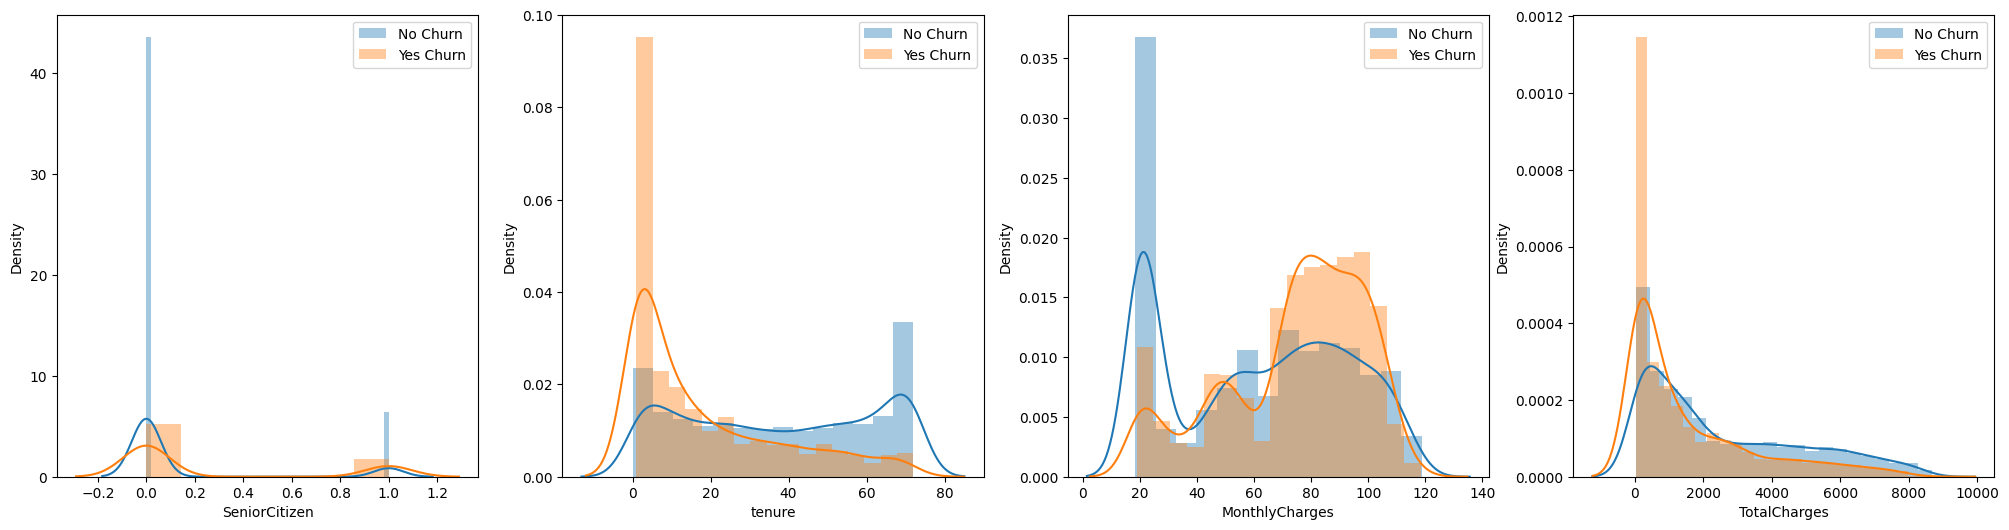

In [15]:
#distplot : 밀도 추정 함수도 같이 표시

plt.figure(figsize =(25,6))

for i in range(len(num_col)):
  plt.subplot(1,4,i+1)
  sns.distplot(df_no[num_col[i]], label='No Churn')
  sns.distplot(df_yes[num_col[i]], label='Yes Churn')
  plt.legend()

## 미션 2 - 주요 범주형 변수와 정답 값 비교하기

* 범주형 변수가 타겟 변수에 어떤 영향을 미치는지 이해함으로써, 해당 변수의 중요성을 파악할 수 있습니다. 이는 피처 선택 과정에서 중요한 지표가 됩니다. 범주형 변수와 정답 값 간의 관계를 분석함으로써 비즈니스 의사결정, 데이터 전략 수립, 모델 설계에 활용할 수 있습니다. 범주형 변수가 타겟 변수와 강한 관계를 보일 경우, 이는 모델의 예측 성능을 향상시킬 수 있는 중요한 피처임을 알아볼 수 있습니다. 범주형 변수와 정답 값 간의 비교를 통해 예상치 못한 패턴이나 이상치를 발견할 수 있습니다. 이는 데이터 전처리 과정에서 문제점을 해결하고 데이터의 품질을 개선하는 데 도움이 됩니다.
* 주요 범주형 변수와 타겟값인 이탈여부를 분석하는 시각화를 진행하고 그 과정에서 알게된 점을 정리해 주세요.

<img src="https://i.imgur.com/Q1KpQpP.png" width="500">

In [16]:
nunique = df.nunique()
nunique # 범주형 변수는 값이 4 종류 이하

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6530
Churn                  2
dtype: int64

In [17]:
category_col = nunique[nunique < 5] # 범주형 변수만 선별
category_col

gender              2
SeniorCitizen       2
Partner             2
Dependents          2
PhoneService        2
MultipleLines       3
InternetService     3
OnlineSecurity      3
OnlineBackup        3
DeviceProtection    3
TechSupport         3
StreamingTV         3
StreamingMovies     3
Contract            3
PaperlessBilling    2
PaymentMethod       4
Churn               2
dtype: int64

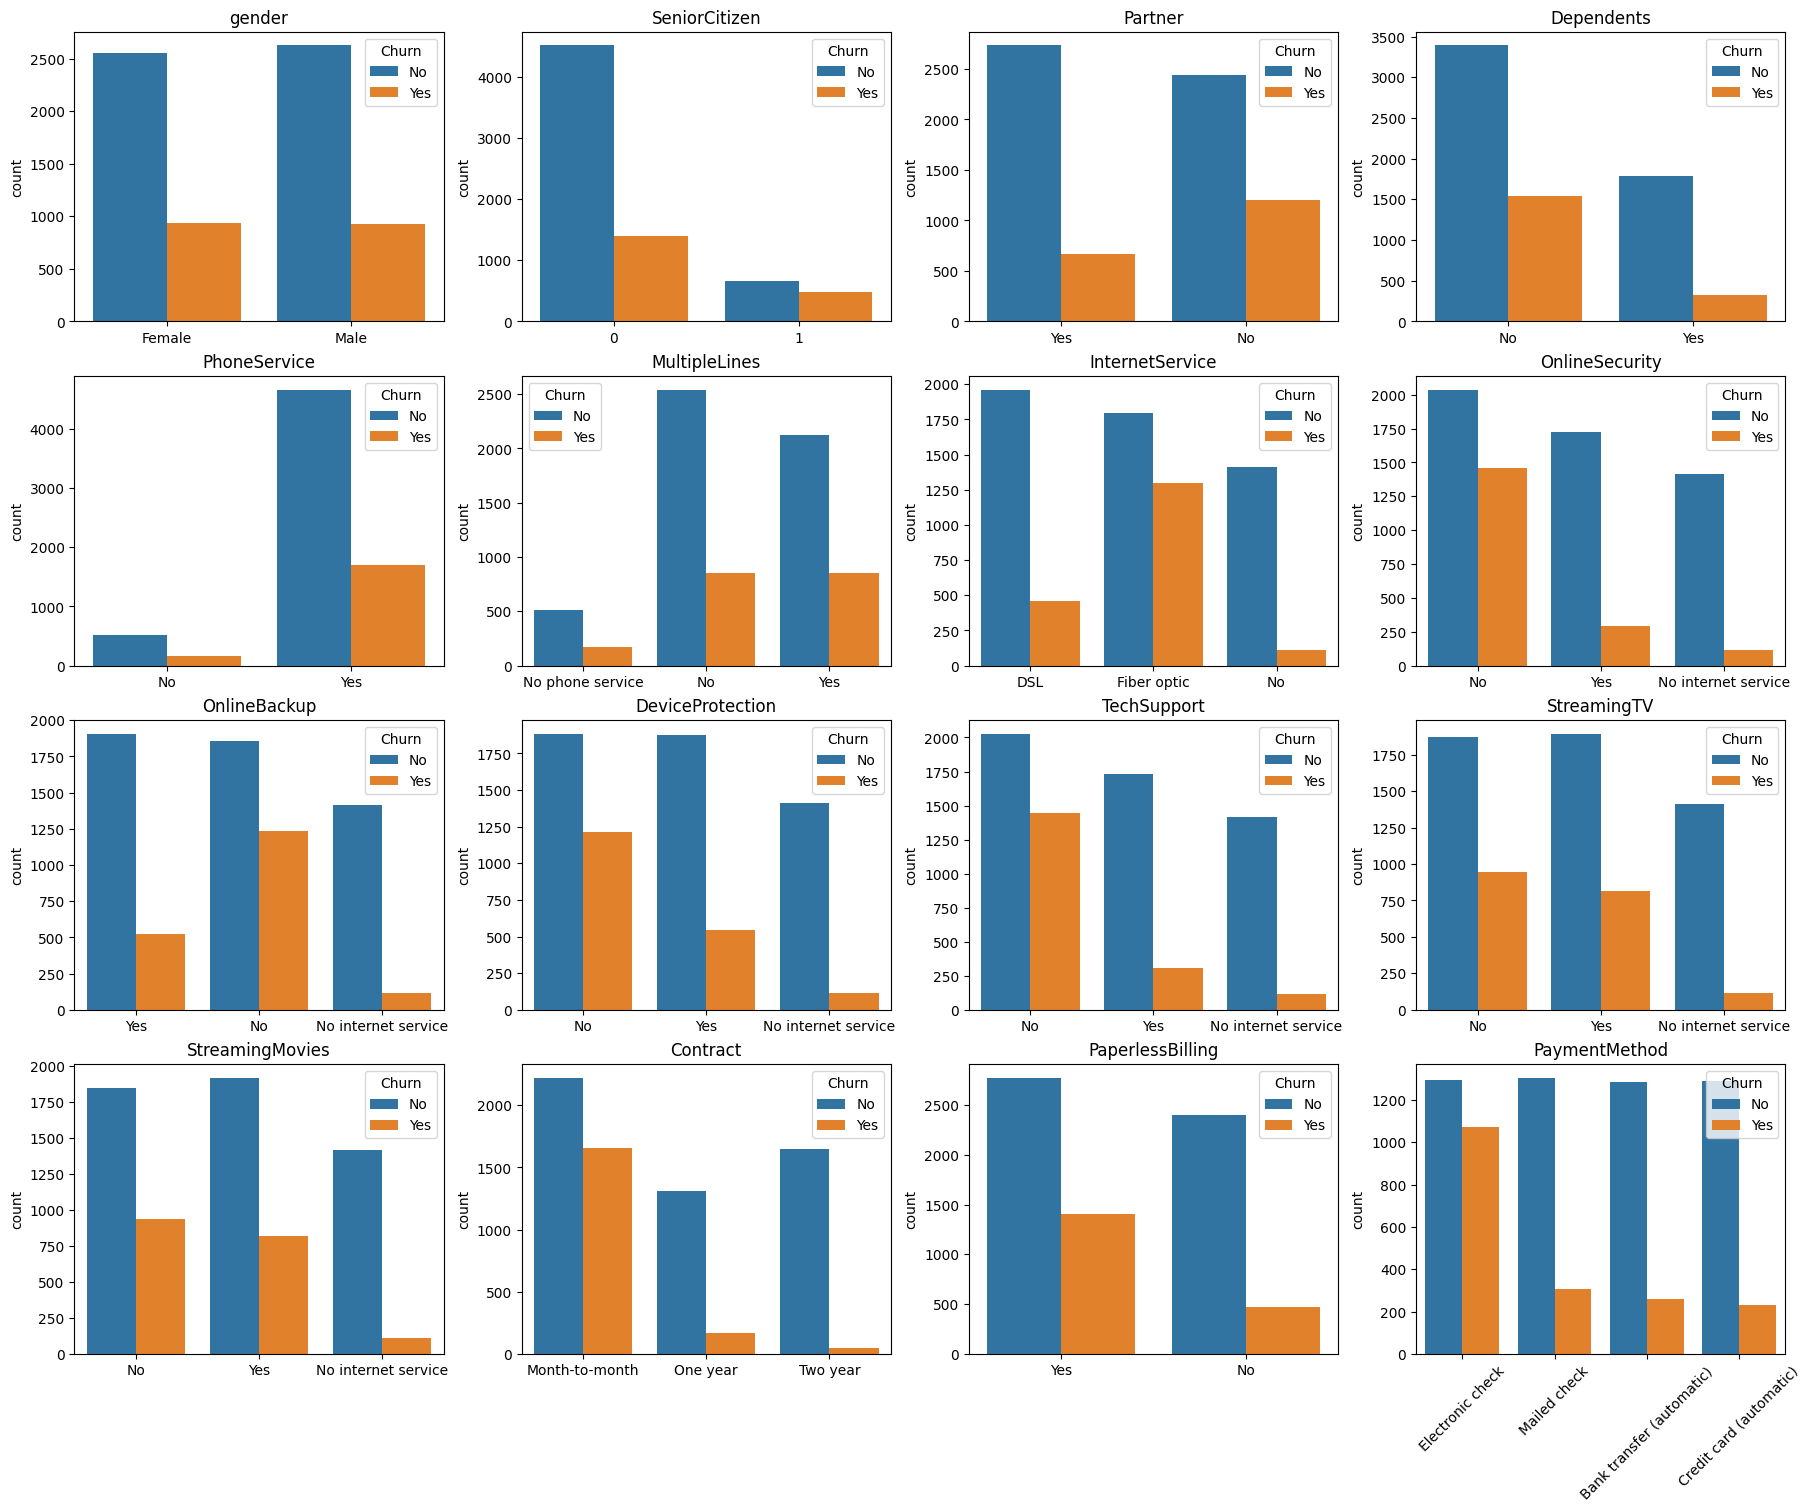

In [18]:
# 다음의 코드를 실행하면 범주형 변수를 볼 수 있습니다.
# 위 예시처럼 시각화를 여기에 구현해 주세요.
category_col_name = category_col.index.tolist()
category_col_name[:16] #Churn 빼고 나머지 범주형 변수

# countplot 그리기
# 각 컬럼 별 이탈률 확인 가능
plt.figure(figsize=(18,15), constrained_layout = True)
count = 1
for i in range(len(category_col_name[:16])):
  plt.subplot(4, 4, count)
  sns.countplot(data=df, x=category_col_name[i], hue="Churn")
  plt.title(category_col_name[i])
  plt.xlabel("")
  if category_col_name[i] in category_col[(category_col > 3)].index.tolist():
    plt.xticks(rotation=45)
  count += 1


# 노인의 경우 청년보다 이탈률이 높다
# 배우자가 없을 경우 이탈률이 높다
# 부양 가족이 없을 경우의 이탈률이 높다


In [19]:
#범주 클래스 안에서의 이탈 비율 : pie chart

def count_pie(col):
  uni = df[col].unique().tolist()
  count = 1
  for e in uni:
    plt.subplot(1,len(uni),count)
    p = df[df[col] == e].Churn.value_counts()
    p.plot.pie(autopct='%.1f%%')
    plt.title(col+'\n'+ str(e),fontsize = 12 , fontweight = 'bold')
    count += 1


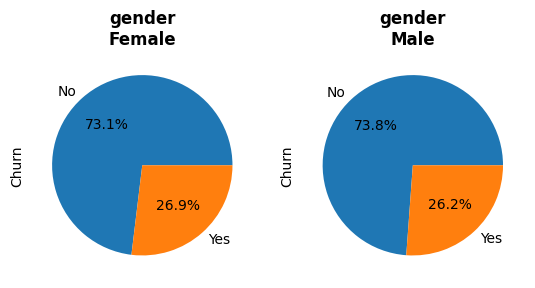

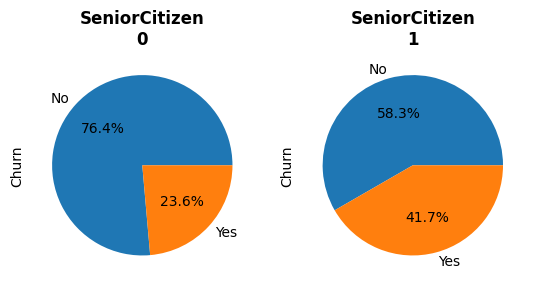

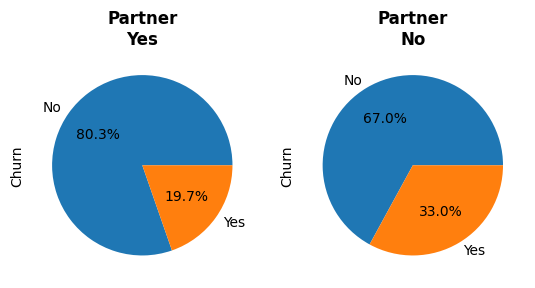

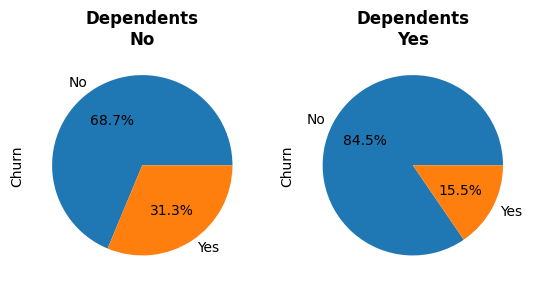

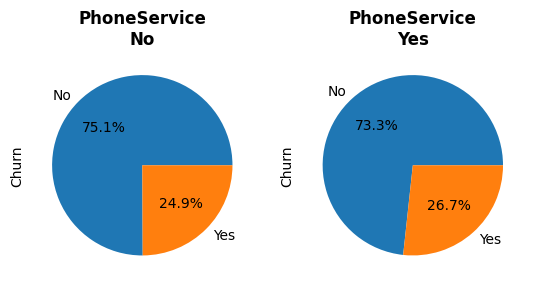

In [20]:
# 범주형 변수 5개 pie chart
for i in range(len(category_col_name[:5])):
  plt.figure(i+1)
  count_pie(category_col_name[i])

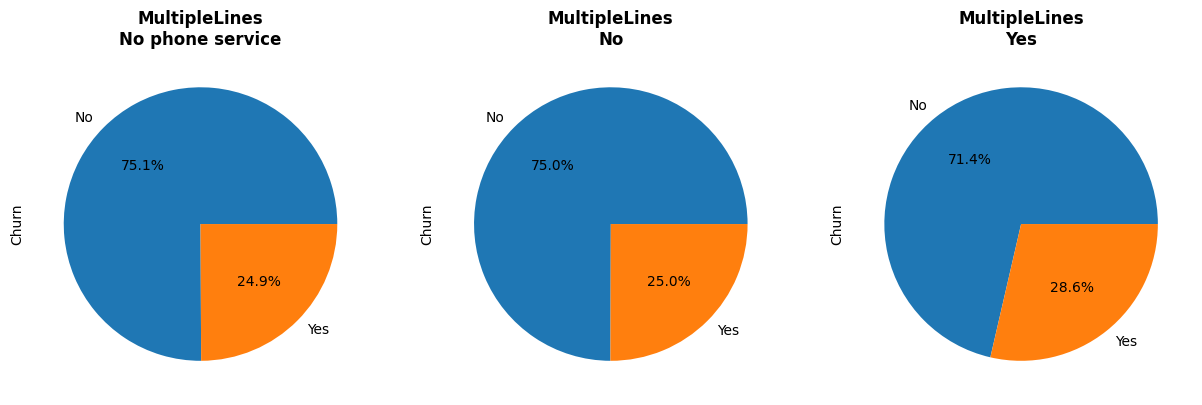

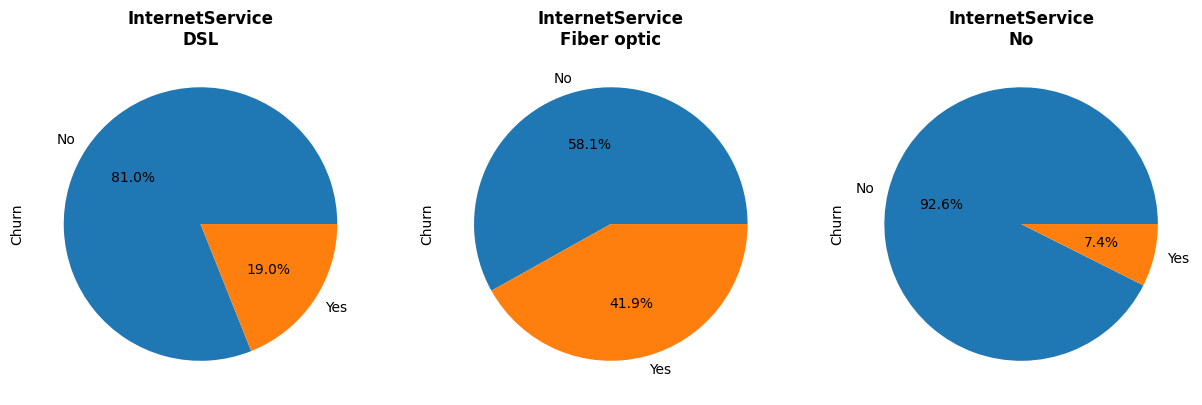

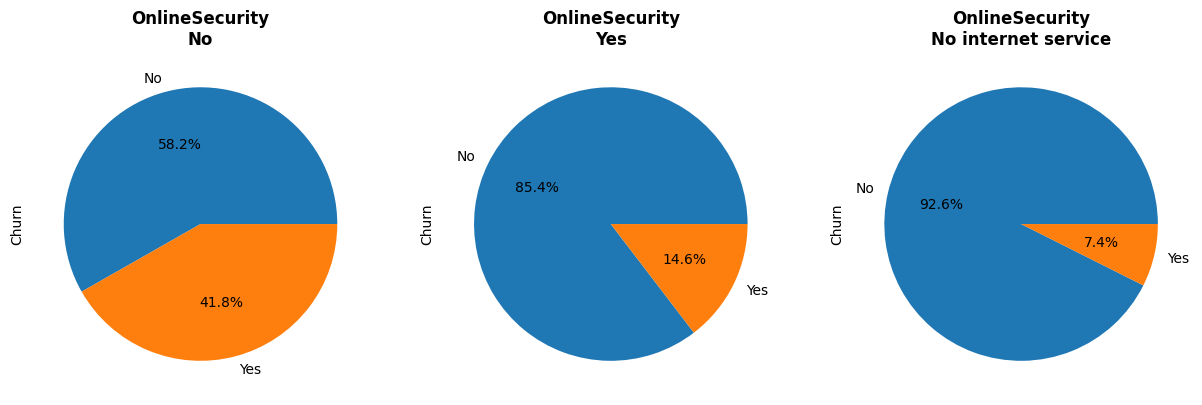

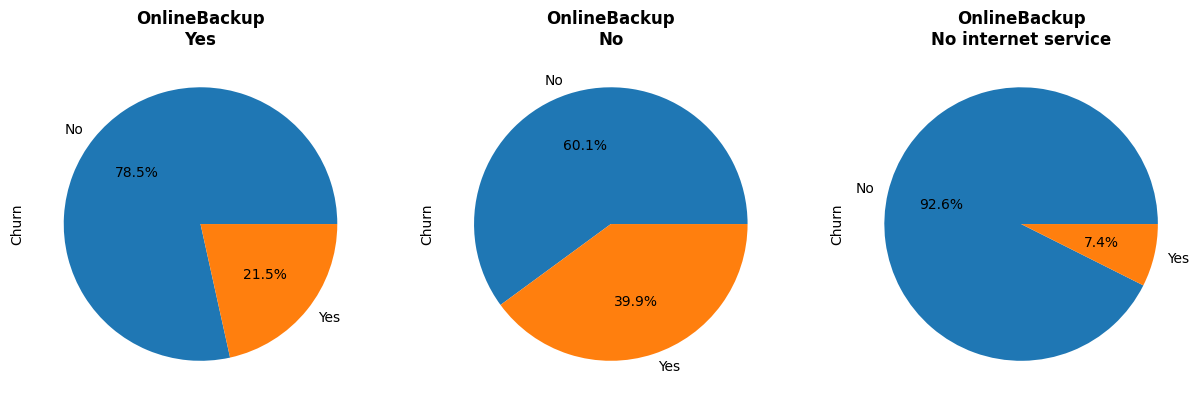

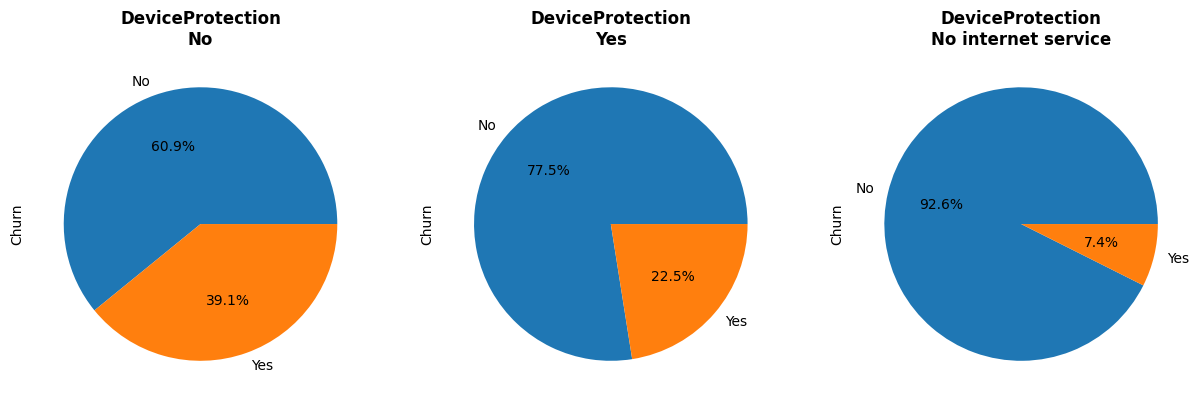

In [21]:
for i in range(len(category_col_name[5:10])):
  plt.figure(i+1, figsize=(15, 5))
  count_pie(category_col_name[i+5])

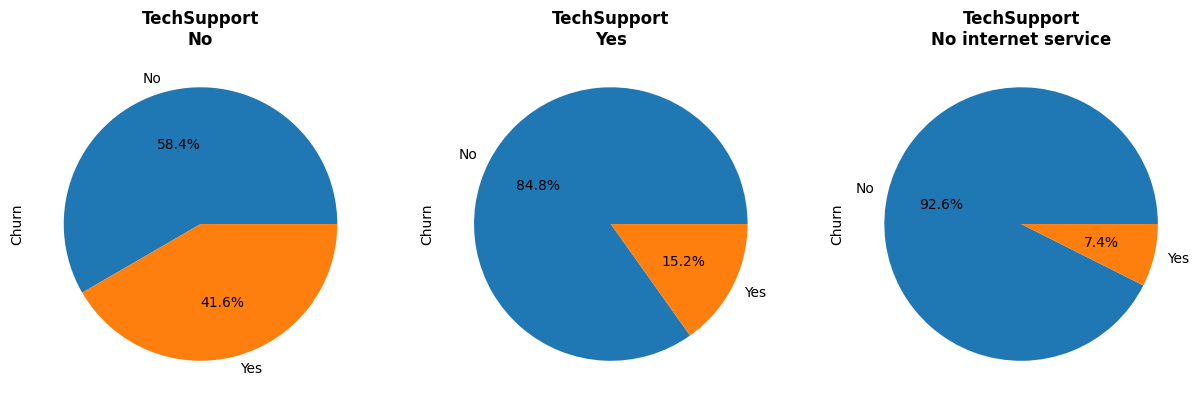

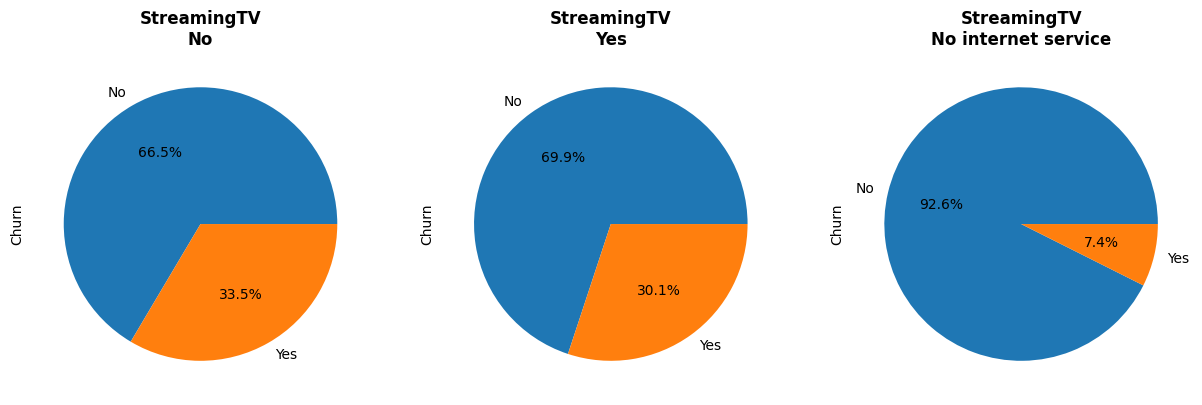

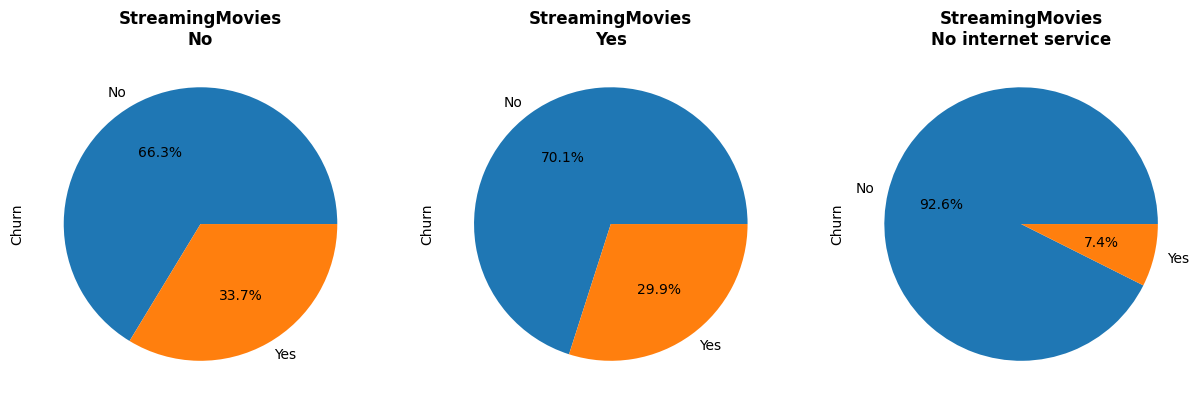

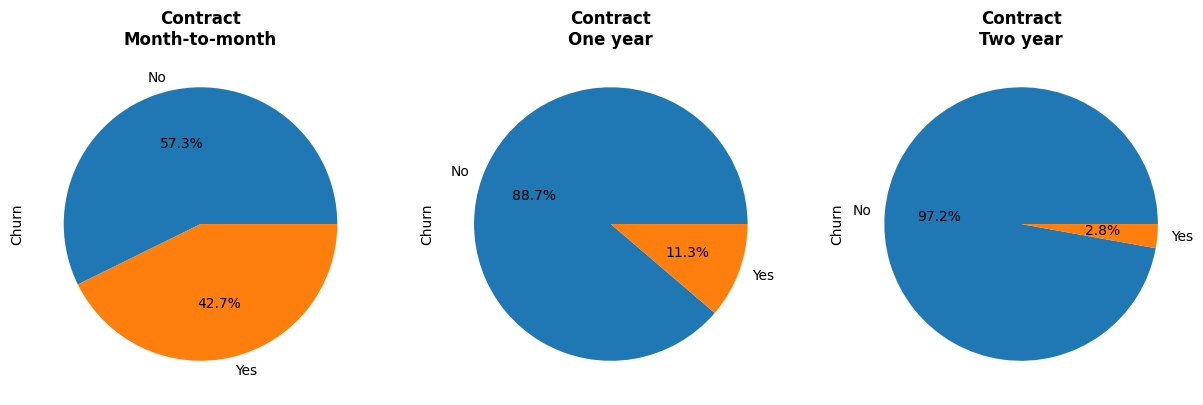

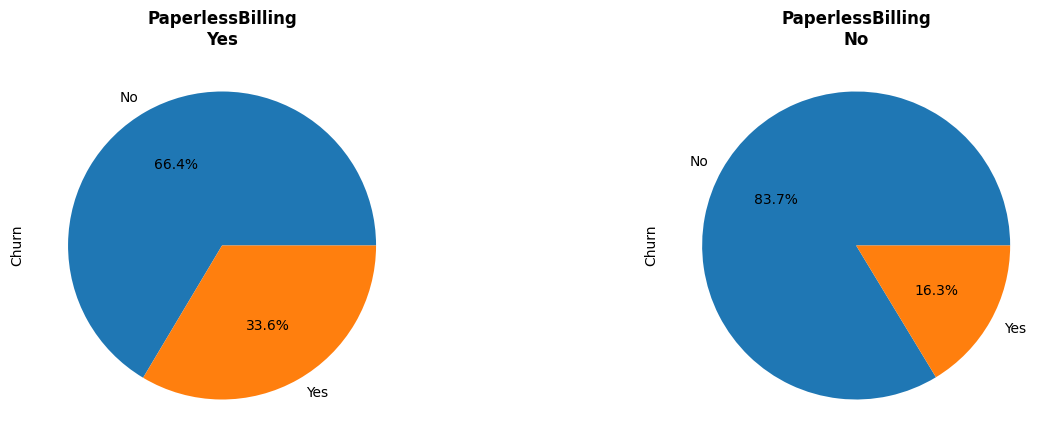

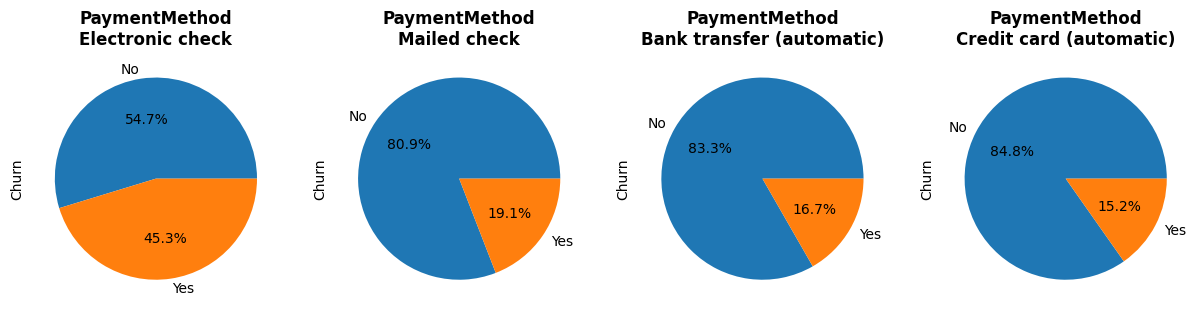

In [22]:
for i in range(len(category_col_name[10:16])):
  plt.figure(i+1, figsize=(15, 5))
  count_pie(category_col_name[i+10])

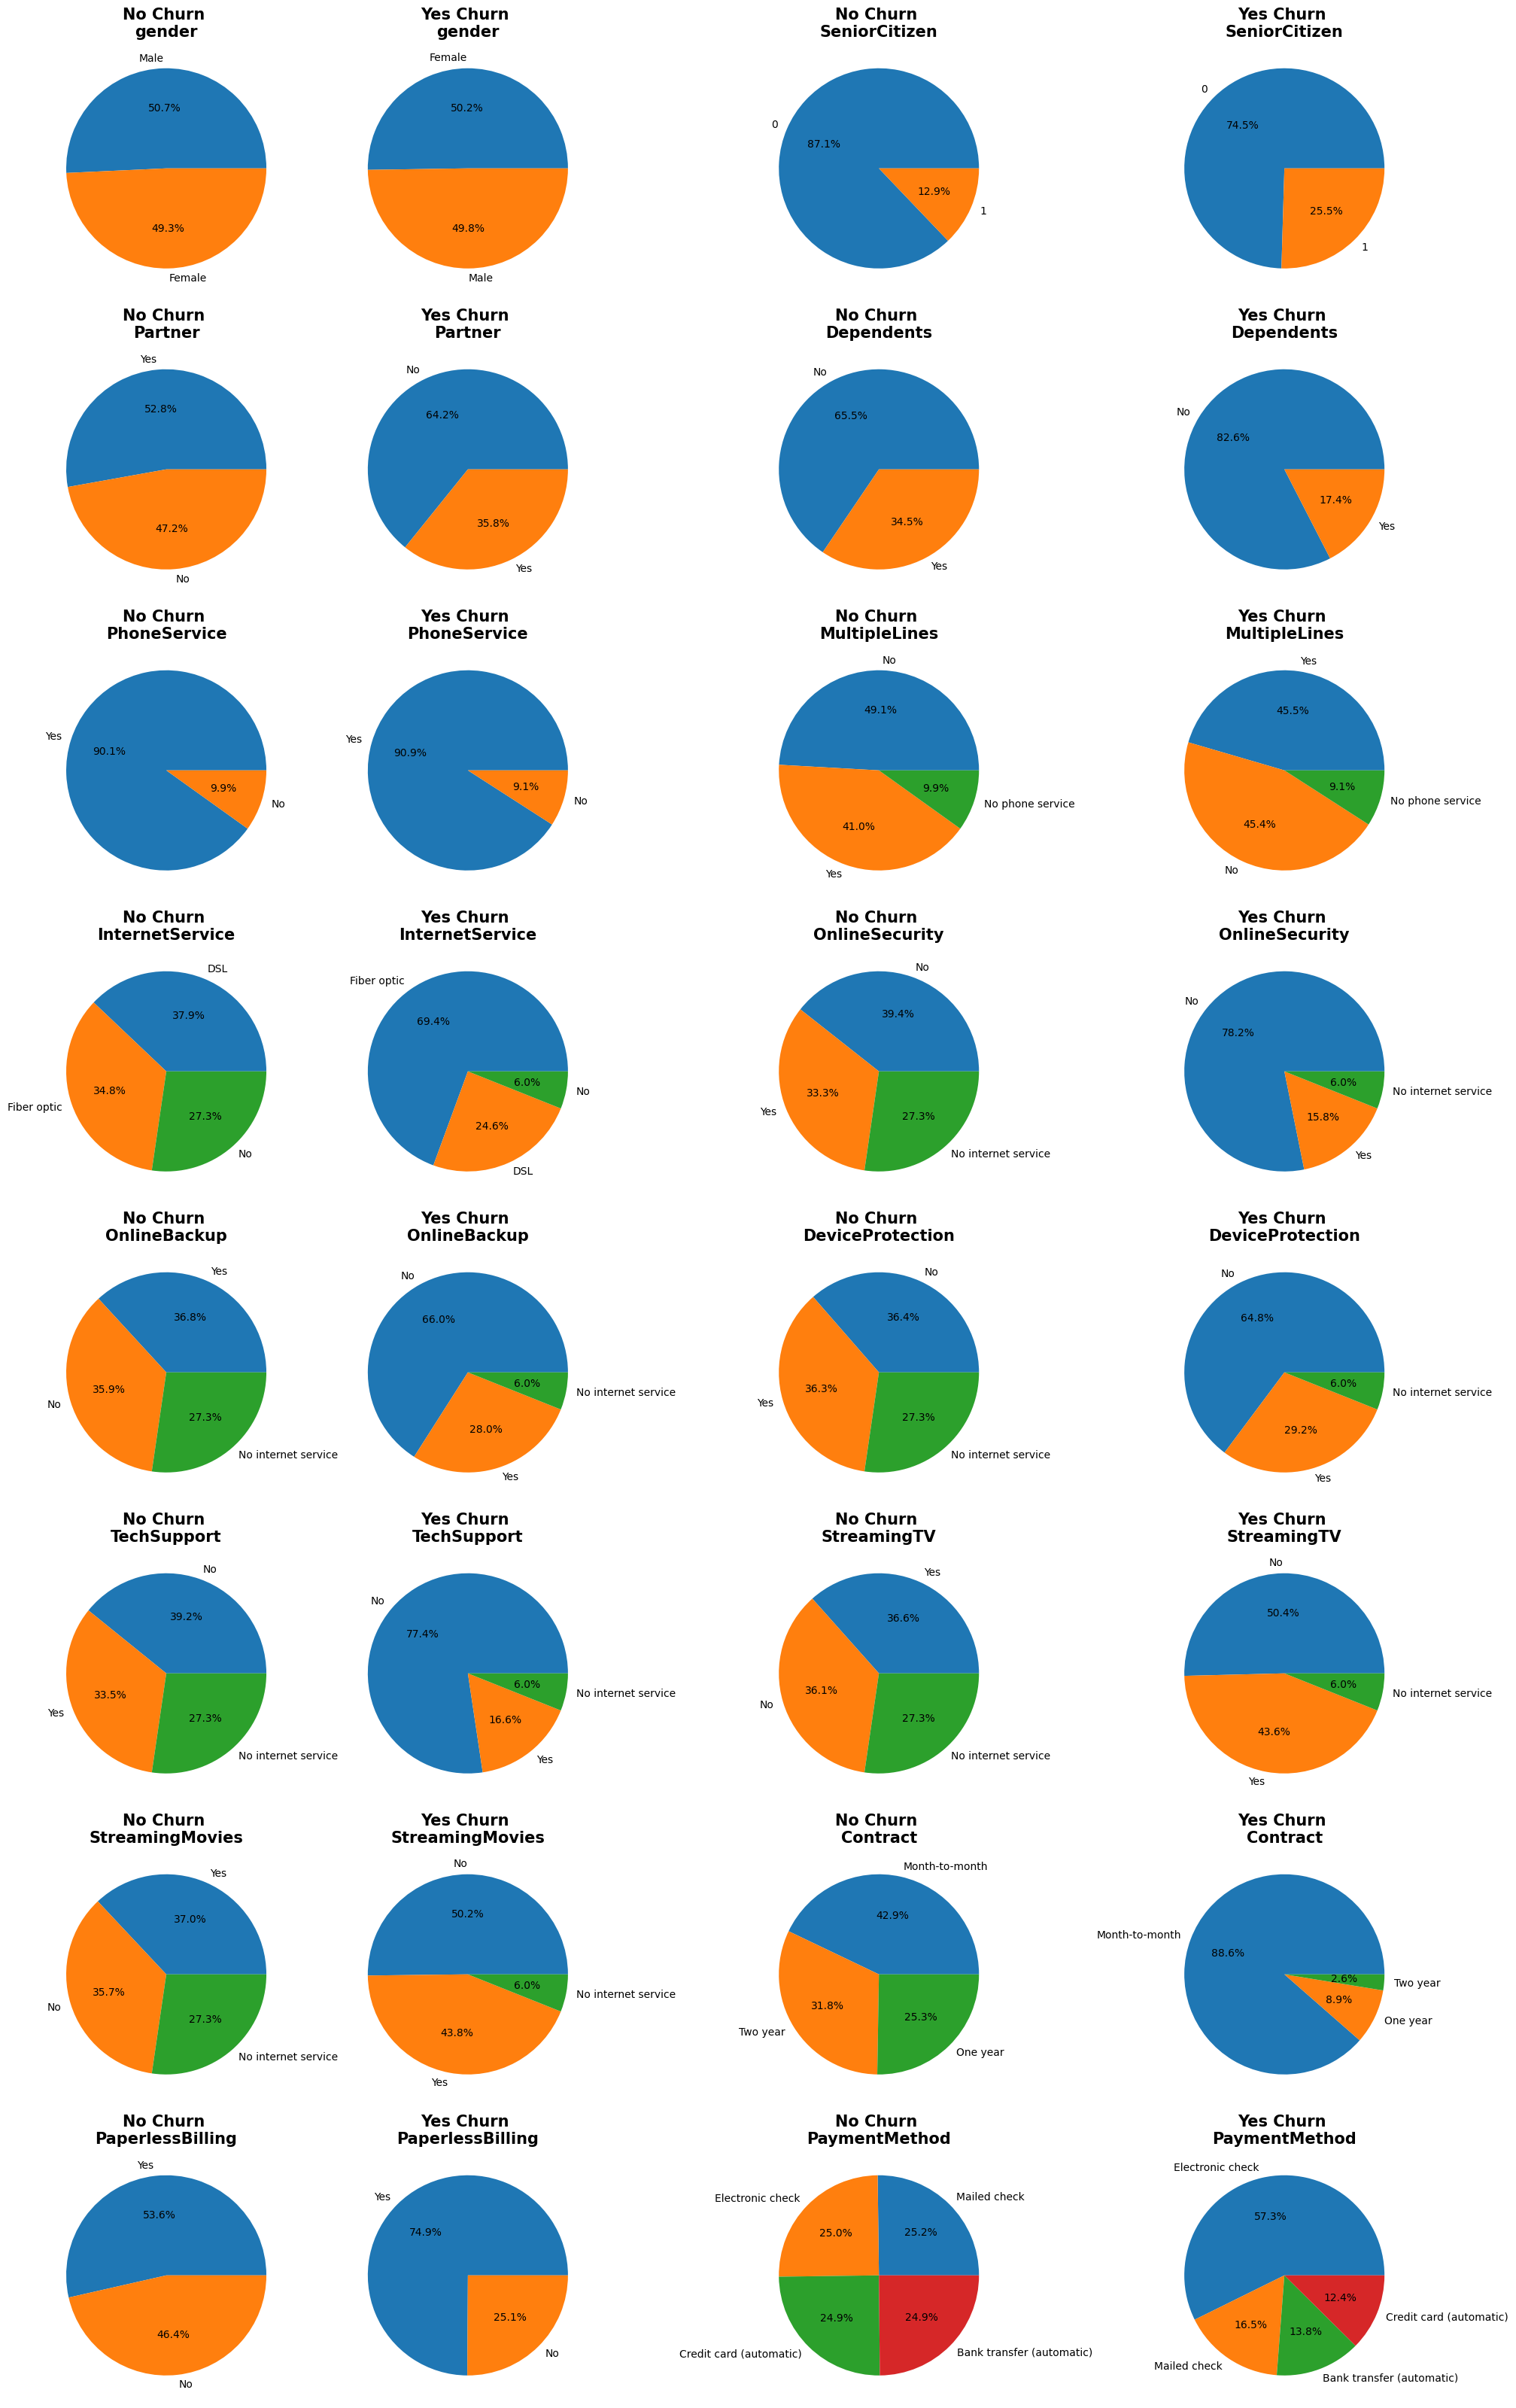

In [23]:
#pie chart
# 이탈자 / 비이탈자 영역에서의 각 클래스별 비율
# 이탈자에서 각 영역별 비율이 어떻게 되는지,
# 비이탈자에서 각 영역별 비율이 어떻게 되는지,

df_no = df[df['Churn'] == 'No'].copy()
df_yes = df[df['Churn'] == 'Yes'].copy()


plt.figure(figsize=(20, 32), constrained_layout = True)
n = 1

for i in range(len(category_col_name[:16])):
  plt.subplot(8, 4, (2*n-1))
  no_value = df_no[category_col_name[i]].value_counts()
  no_value.plot.pie(autopct='%.1f%%')
  plt.title('No Churn \n'+category_col_name[i], fontsize = 15 , fontweight = 'bold')
  plt.ylabel("")

  plt.subplot(8, 4, (2*n))
  yes_value = df_yes[category_col_name[i]].value_counts()
  yes_value.plot.pie(autopct='%.1f%%')
  plt.title('Yes Churn \n'+category_col_name[i], fontsize = 15 , fontweight = 'bold')
  plt.ylabel("")
  n += 1

# 달마다 계약 갱신의 경우, 이탈 빈도 높음

## 미션 3 - 수치변수 간의 관계를 파악하기 위해 그래프를 시각화 하고 상관계수를 구해주세요.


상관계수를 통해 변수들 간의 선형적 관계를 파악합니다. 높은 상관관계를 보이는 변수들을 식별하여, 중복되거나 불필요한 특징을 제거함으로써 모델의 성능을 최적화할 수 있습니다. 강한 상관관계를 가진 변수들을 식별하여, 다중공선성 문제를 방지합니다. 상관 행렬을 시각화하여 데이터의 패턴과 특성을 더 잘 이해하고, 피처엔지니어링에 어떻게 활용할지 시각화 결과를 해석해 보세요. 또, 아래 예시와 똑같이 구해도 되지만 다른 변수를 추가하거나 여러분만의 인사이트를 추가해서 구해도 좋습니다.


|                |   SeniorCitizen |    tenure |   MonthlyCharges |
|:---------------|----------------:|----------:|-----------------:|
| SeniorCitizen  |       1         | 0.0165669 |         0.220173 |
| tenure         |       0.0165669 | 1         |         0.2479   |
| MonthlyCharges |       0.220173  | 0.2479    |         1        |




<table>
    <tr>
        <td><img src="https://i.imgur.com/RTfJDJN.png" width="300"></td>
        <td><img src="https://i.imgur.com/41Y04lj.png" width="300"></td>
    </tr>
</table>

In [24]:
# 여기에 상관계수를 구하고 heatmap 으로 시각화 해주세요.
df_corr = df.corr()
df_corr

<ipython-input-24-894c124515a1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df.corr()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.102411
tenure,0.016567,1.000000,0.247900,0.825880
MonthlyCharges,0.220173,0.247900,1.000000,0.651065
TotalCharges,0.102411,0.825880,0.651065,1.000000


<Axes: >

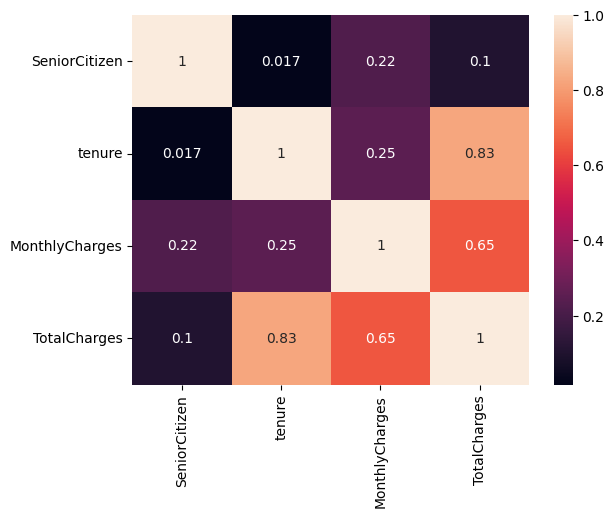

In [25]:
# 여기에 상관계수를 구하고 heatmap 으로 시각화 해주세요.
sns.heatmap(df_corr, annot=True)

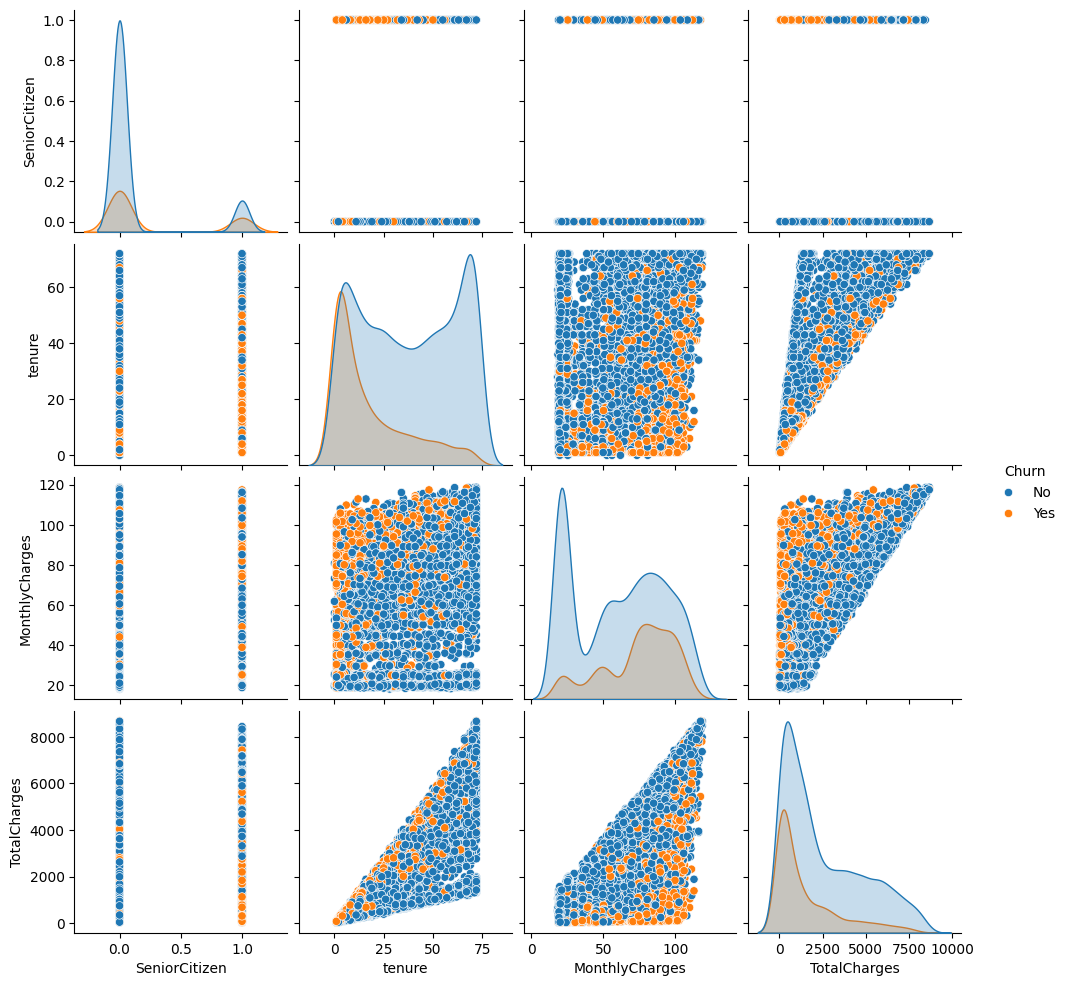

In [26]:
# seaborn 의 pairplot 으로 이탈여부(Churn)에 따라 시각화 해주세요.

sns.pairplot(df, hue='Churn')


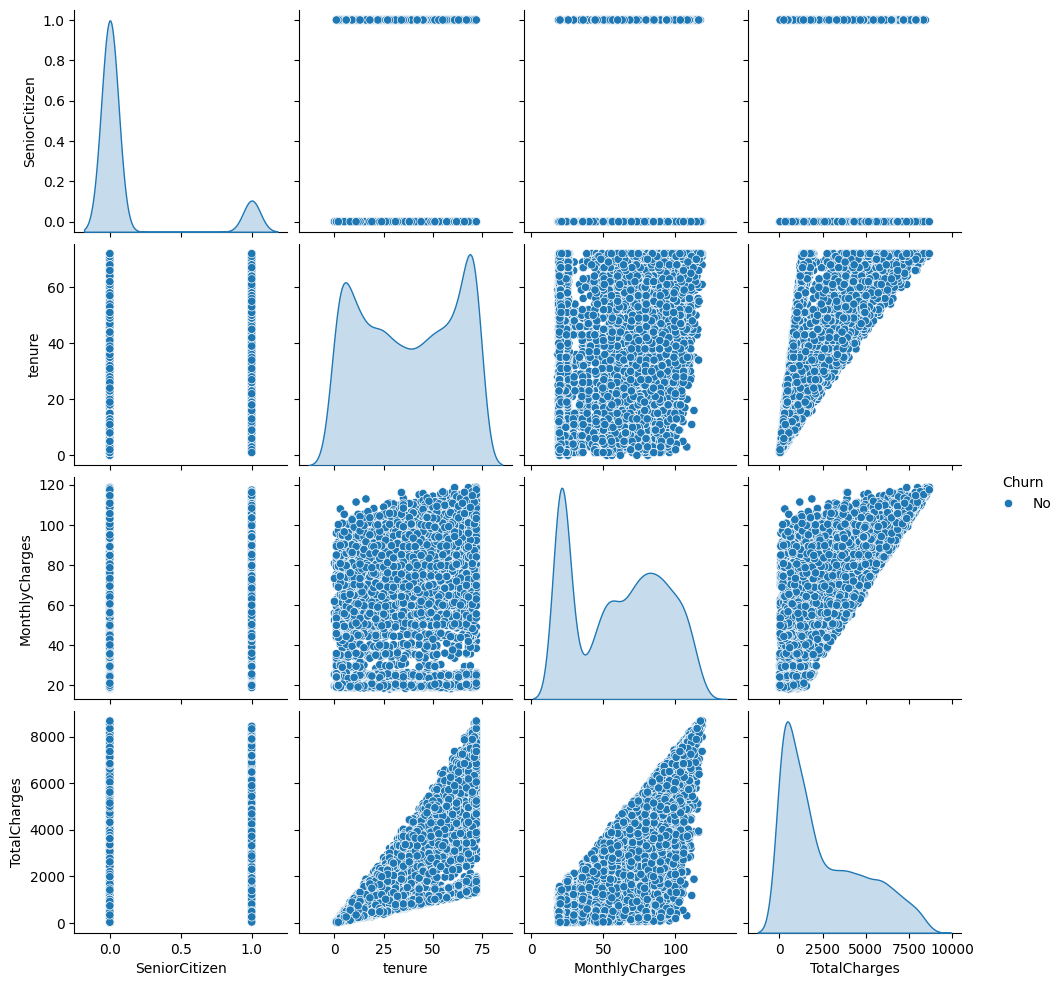

In [27]:
sns.pairplot(df_no, hue='Churn')

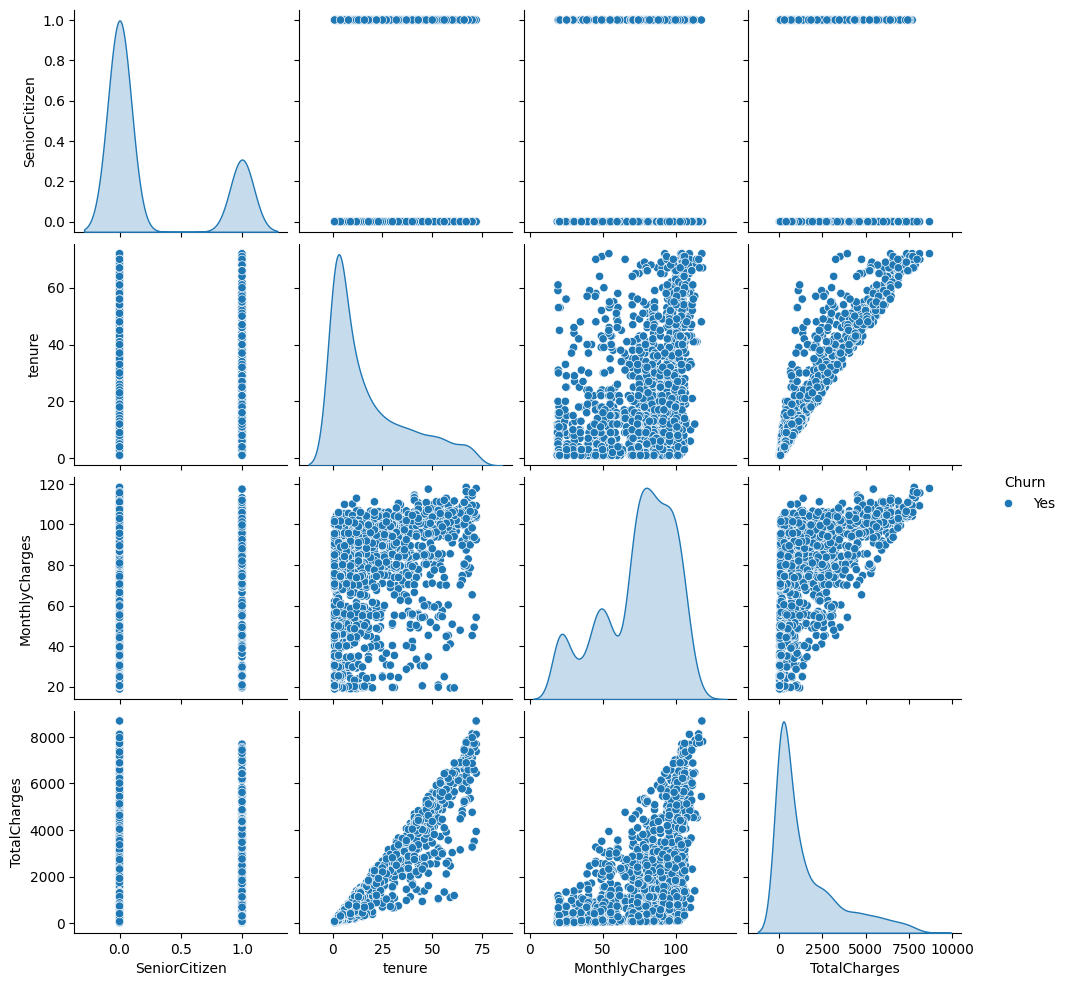

In [28]:
sns.pairplot(df_yes, hue='Churn')

In [29]:
# 서포트 등 보안 관련 서비스 가입 개수 여부에 따라 이탈률에 큰 차이를 보일까?

df_ser = df.copy()

df_ser

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


In [30]:
# internet 가입 안 한 고객들은 관련 서비스에서 No internet service 로만 표시되는가 확인 > yes
no_inter = df_ser[df_ser['InternetService'] == 'No'].nunique()
print(no_inter)
df_ser[df_ser['InternetService'] == 'No'].head(2)

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           1
MultipleLines          2
InternetService        1
OnlineSecurity         1
OnlineBackup           1
DeviceProtection       1
TechSupport            1
StreamingTV            1
StreamingMovies        1
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges       123
TotalCharges        1381
Churn                  2
dtype: int64


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7469-LKBCI,Male,0,No,No,16,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),18.95,326.80,No
8191-XWSZG,Female,0,No,No,52,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.65,1022.95,No


In [31]:
# 인터넷 서비스에 가입한 고객만 가지고 판단

no_inter_list = no_inter[no_inter == 1].index.to_list() # 고유 값 개수가 1인 컬럼만 추출
print(no_inter_list) # 'PhoneService', 'InternetService' 가입 여부 확인이기 때문에 사용 안함 / 'StreamingTV', 'StreamingMovies' 는 제외 (보안 관련 아님 )
no_inter_list = no_inter_list[2:6]
print(no_inter_list)
df_ser = df_ser[df_ser['InternetService'] != 'No'] #가입 고객만 불러옴
df_ser.head(3)

['PhoneService', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport']


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [32]:
df_x = df_ser[no_inter_list] # 보안 관련 인터넷 서비스 항목만 추출하여 원핫 인코딩
df_x = pd.get_dummies(df_x, drop_first=True) #drop_first를 사용하여 No 데이터는 drop
df_x

,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes
customerID,,,,
7590-VHVEG,0,1,0,0
5575-GNVDE,1,0,1,0
3668-QPYBK,1,1,0,0
7795-CFOCW,1,0,1,1
9237-HQITU,0,0,0,0
...,...,...,...,...
6840-RESVB,1,0,1,1
2234-XADUH,0,1,1,0
4801-JZAZL,1,0,0,0


In [33]:
df_y = pd.DataFrame(df_ser['Churn']) # 이탈 여부 추출

temp = pd.concat([df_x, df_y], axis=1) #데이터 병합

temp['sum_internet_service'] = temp['OnlineSecurity_Yes'] + temp['OnlineBackup_Yes'] + temp['DeviceProtection_Yes'] + temp['TechSupport_Yes'] # 총 가입 갯수
temp

,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,Churn,sum_internet_service
customerID,,,,,,
7590-VHVEG,0,1,0,0,No,1
5575-GNVDE,1,0,1,0,No,2
3668-QPYBK,1,1,0,0,Yes,2
7795-CFOCW,1,0,1,1,No,3
9237-HQITU,0,0,0,0,Yes,0
...,...,...,...,...,...,...
6840-RESVB,1,0,1,1,No,3
2234-XADUH,0,1,1,0,No,2
4801-JZAZL,1,0,0,0,No,1


In [34]:
temp['sum_internet_service'].describe() #요약 통계 #약 1.6개가 평균

count    5517.000000
mean        1.615733
std         1.244375
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         4.000000
Name: sum_internet_service, dtype: float64

<Axes: xlabel='Churn', ylabel='sum_internet_service'>

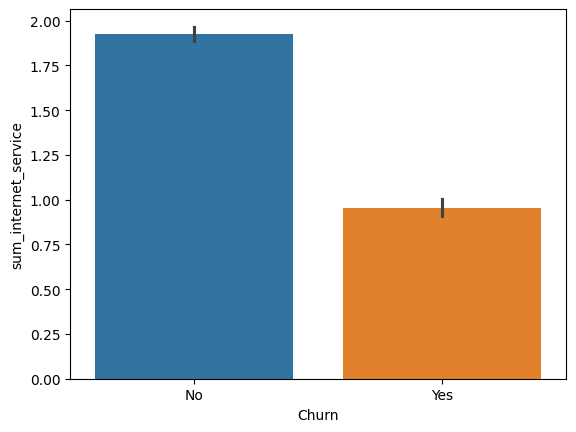

In [35]:
sns.barplot(data=temp, x="Churn", y='sum_internet_service', hue="Churn") #이탈자는 보안 관련 가입한 서비스 평균 갯수가 적음

In [36]:
#t-test 수행
# 차이가 존재하는가? => 0.05 보다 작음; 두 집단에 유의미한 차이가 존재
import scipy.stats as stats
no_test = temp[temp['Churn'] == 'No']
yes_test = temp[temp['Churn'] == 'Yes']

leve = stats.levene(no_test['sum_internet_service'], yes_test['sum_internet_service'])
print("stat %.10f, pvalue %.30f" %leve) #등분산성 검정
#대립가설 채택 > 이분산성

stat 112.3298829422, pvalue 0.000000000000000000000000053732


In [37]:
print('t-test 결과:', stats.ttest_ind(no_test['sum_internet_service'], yes_test['sum_internet_service'], equal_var=False)) #이분산성이므로 False 설정

#p-value 가 0.05 미만이므로 두 집단에 유의미한 차이가 존재 == 귀무가설 기각
#귀무가설 : 유의미한 차이가 없다


t-test 결과: TtestResult(statistic=31.328051289456297, pvalue=1.2286287285076492e-193, df=4164.113921915411)


<Axes: xlabel='Churn', ylabel='count'>

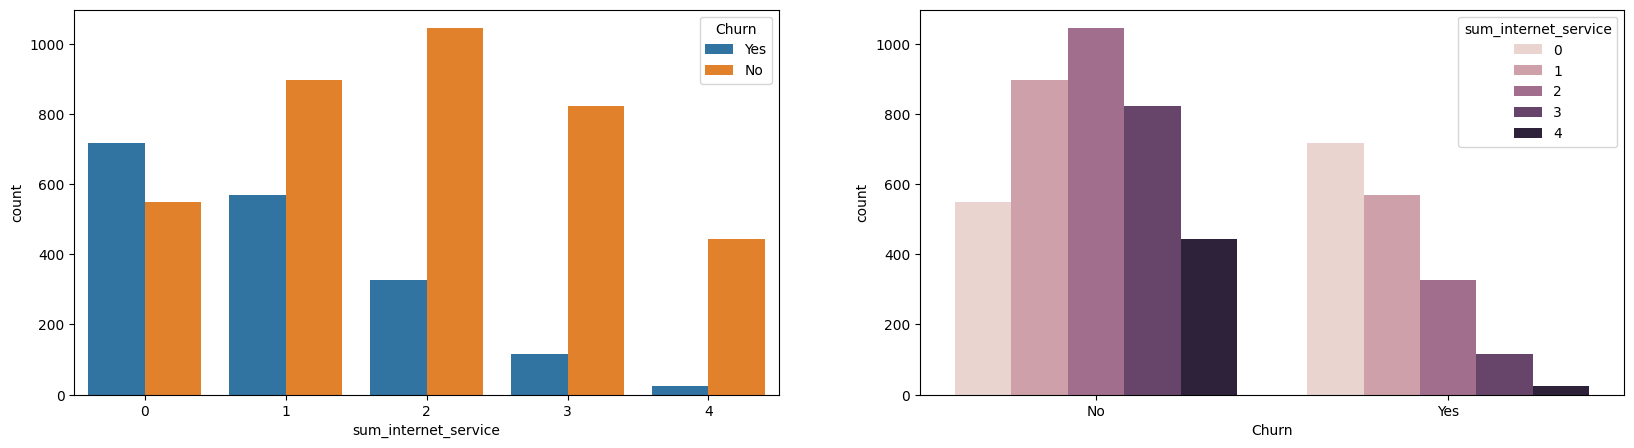

In [38]:
# countplot
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.countplot(data=temp,x='sum_internet_service', hue="Churn")
plt.subplot(1,2,2)
sns.countplot(data=temp,hue='sum_internet_service', x="Churn")

Text(0, 0.5, '')

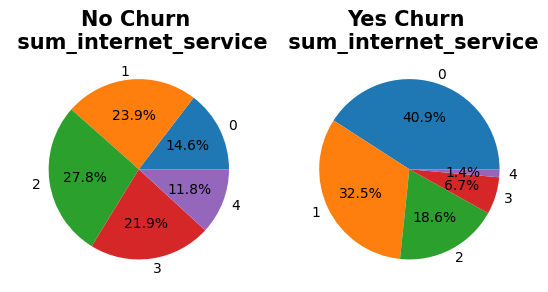

In [39]:
no_temp = temp[temp['Churn'] == 'No']['sum_internet_service'].value_counts().sort_index() #색을 맞춰주기 위해 정렬
yes_temp = temp[temp['Churn'] == 'Yes']['sum_internet_service'].value_counts().sort_index()

plt.subplot(1,2,1)
no_temp.plot.pie(autopct='%.1f%%')
plt.title('No Churn \n sum_internet_service', fontsize = 15 , fontweight = 'bold')
plt.ylabel("")

plt.subplot(1,2,2)
yes_temp.plot.pie(autopct='%.1f%%')
plt.title('Yes Churn \n sum_internet_service', fontsize = 15 , fontweight = 'bold')
plt.ylabel("")


Text(0.5, 1.0, 'sum_internet_service 4')

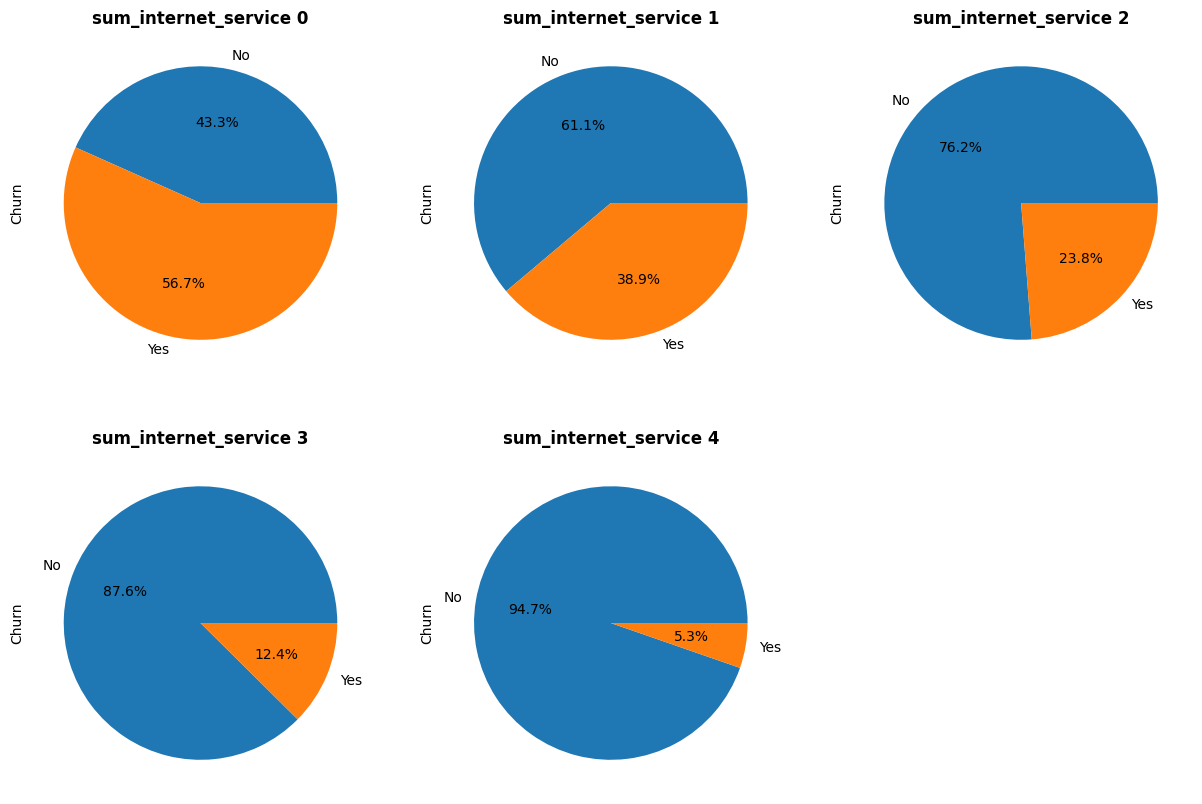

In [40]:
temp_1 = temp[temp['sum_internet_service'] == 0]['Churn'].value_counts().sort_index() #색을 맞춰주기 위해 정렬
temp_2 =  temp[temp['sum_internet_service'] == 1]['Churn'].value_counts().sort_index()
temp_3 =  temp[temp['sum_internet_service'] == 2]['Churn'].value_counts().sort_index()
temp_4 =  temp[temp['sum_internet_service'] == 3]['Churn'].value_counts().sort_index()
temp_5 =  temp[temp['sum_internet_service'] == 4]['Churn'].value_counts().sort_index()

plt.figure(figsize=(15,10))

plt.subplot(2,3,1)
temp_1.plot.pie(autopct='%.1f%%')
plt.title('sum_internet_service 0', fontsize = 12 , fontweight = 'bold')

plt.subplot(2,3,2)
temp_2.plot.pie(autopct='%.1f%%')
plt.title('sum_internet_service 1', fontsize = 12 , fontweight = 'bold')

plt.subplot(2,3,3)
temp_3.plot.pie(autopct='%.1f%%')
plt.title('sum_internet_service 2', fontsize = 12 , fontweight = 'bold')

plt.subplot(2,3,4)
temp_4.plot.pie(autopct='%.1f%%')
plt.title('sum_internet_service 3', fontsize = 12 , fontweight = 'bold')

plt.subplot(2,3,5)
temp_5.plot.pie(autopct='%.1f%%')
plt.title('sum_internet_service 4', fontsize = 12 , fontweight = 'bold')

#이탈자일수록 보안 관련 서비스에 적게 가입되어 있다

<Axes: xlabel='Churn', ylabel='sum_internet_service'>

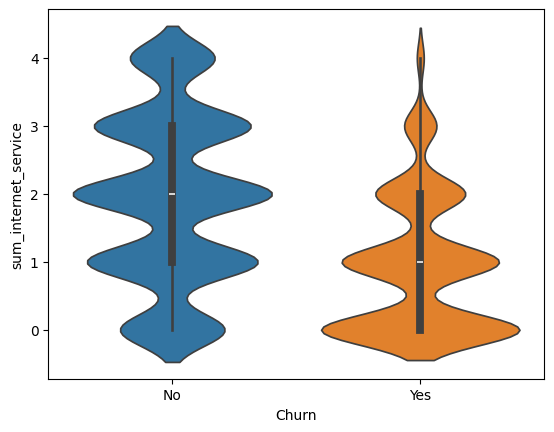

In [41]:
sns.violinplot(data=temp, x="Churn", y='sum_internet_service', hue="Churn") #분포 확인